In [11]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('./jupyter_nbs/pokemon/Pokemon.csv')
engine = create_engine('sqlite://', echo=False)
df.to_sql('pokemon', engine, if_exists='replace', index=False)

800

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [30]:
df.columns = df.columns\
                .str.replace(' ', '')\
                .str.replace('.', '')\
                .str.replace('#', 'PokeDex')
# replace SQL database:
df.to_sql('pokemon', engine, if_exists='replace', index=False)

800

In [31]:
pd.read_sql_query("""SELECT COUNT(*) row_count 
                     FROM pokemon""", engine)

,row_count
0,800


In [32]:
pd.read_sql_query("""SELECT * 
                     FROM pokemon 
                     LIMIT 5""", engine)

,PokeDex,Name,Type1,Type2,Total,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,0


# INSIGHTS

In [33]:
strongest_type = pd.read_sql_query("""
                    SELECT Type1,
                        ROUND(
                            AVG(total), 1
                        ) AvgTotalStats,
                        COUNT(*) Count
                    FROM pokemon
                    GROUP BY 1 
                    ORDER BY 2 DESC""", engine)
strongest_type

,Type1,AvgTotalStats,Count
0,Dragon,550.5,32
1,Steel,487.7,27
2,Flying,485.0,4
3,Psychic,475.9,57
4,Fire,458.1,52
5,Rock,453.8,44
6,Dark,445.7,31
7,Electric,443.4,44
8,Ghost,439.6,32
9,Ground,437.5,32


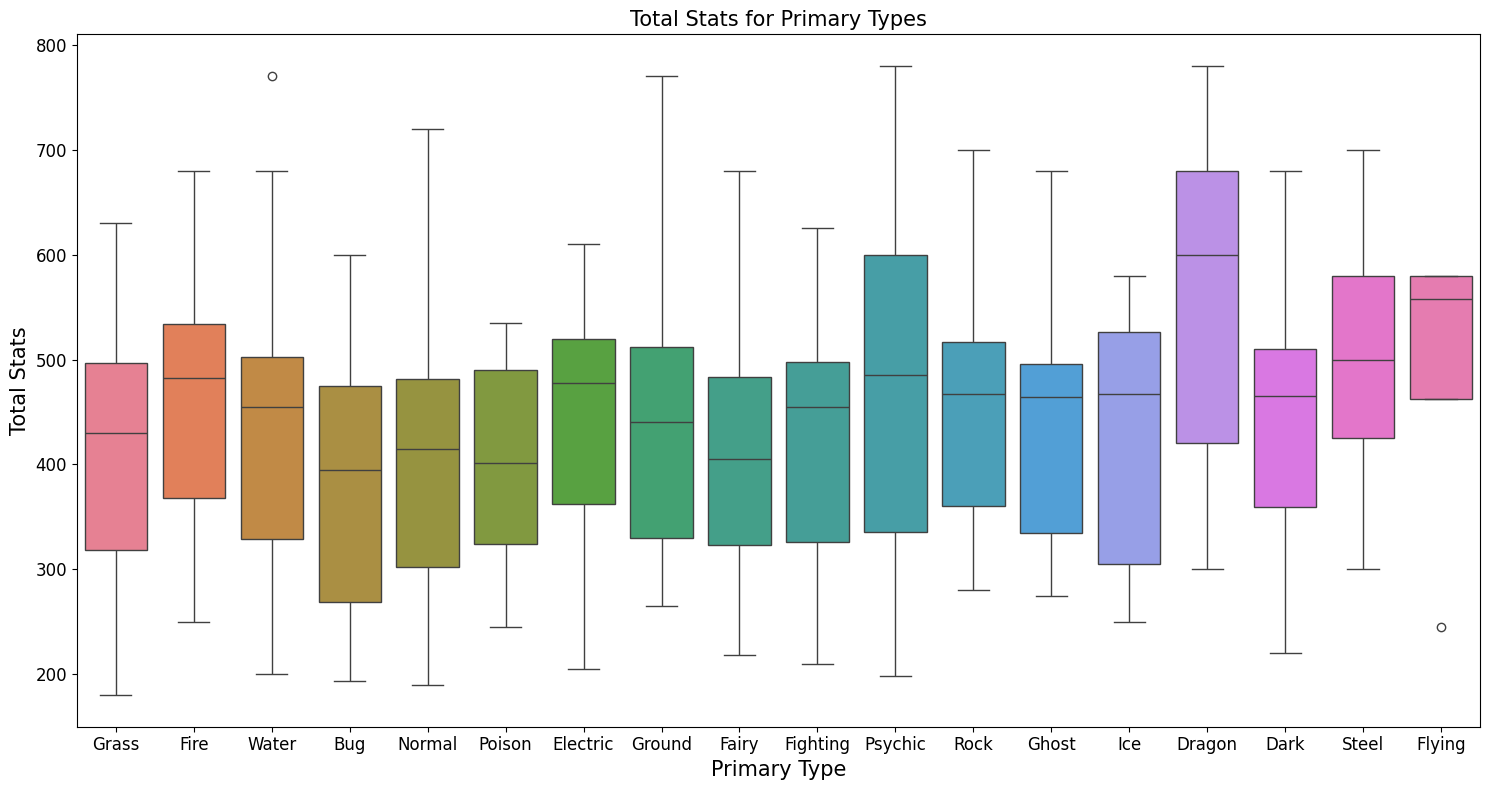

In [48]:
plt.figure(figsize=(15,8))

type1_stats = sns.boxplot(data=df, x='Type1', y='Total', hue='Type1')
type1_stats.axes.set_title('Total Stats for Primary Types', fontsize=15)
type1_stats.set_xlabel('Primary Type', fontsize=15)
type1_stats.set_ylabel('Total Stats', fontsize=15)
type1_stats.tick_params(labelsize=12)

plt.tight_layout()

plt.show()

# Strongest Pokemon

In [35]:
pd.read_sql_query("""SELECT *
                     FROM (
                         SELECT
                             Generation,
                             RANK() OVER (
                                 PARTITION BY Generation
                                 ORDER BY Total DESC
                             ) Rank,
                             Name,
                             CASE 
                                 WHEN Legendary = 1 THEN "Yes" ELSE "No" 
                             END Legendary,
                             Total,
                             HP,
                             Attack Atk,
                             Defense Def,
                             SpAtk,
                             SpDef,
                             Speed
                         FROM pokemon
                         WHERE Name NOT LIKE '%Mega %'
                     )
                     WHERE Rank <= 3
                     ORDER BY Generation, Rank""", engine)

,Generation,Rank,Name,Legendary,Total,HP,Atk,Def,SpAtk,SpDef,Speed
0,1,1,Mewtwo,Yes,680,106,110,90,154,90,130
1,1,2,Dragonite,No,600,91,134,95,100,100,80
2,1,2,Mew,No,600,100,100,100,100,100,100
3,2,1,Lugia,Yes,680,106,90,130,90,154,110
4,2,1,Ho-oh,Yes,680,106,130,90,110,154,90
5,2,3,Tyranitar,No,600,100,134,110,95,100,61
6,2,3,Celebi,No,600,100,100,100,100,100,100
7,3,1,KyogrePrimal Kyogre,Yes,770,100,150,90,180,160,90
8,3,1,GroudonPrimal Groudon,Yes,770,100,180,160,150,90,90
9,3,3,Rayquaza,Yes,680,105,150,90,150,90,95


In [36]:
#No Legendary or Mega
pd.read_sql_query("""SELECT *
                     FROM (
                         SELECT
                             Generation,
                             RANK() OVER (
                                 PARTITION BY Generation
                                 ORDER BY Total DESC
                             ) Rank,
                             Name,
                             Total,
                             HP,
                             Attack Atk,
                             Defense Def,
                             SpAtk,
                             SpDef,
                             Speed
                         FROM pokemon
                         WHERE Legendary = 0
                             AND Name NOT LIKE '%Mega %'
                     )
                     WHERE Rank <= 3
                     ORDER BY Generation, Rank""", engine)

,Generation,Rank,Name,Total,HP,Atk,Def,SpAtk,SpDef,Speed
0,1,1,Dragonite,600,91,134,95,100,100,80
1,1,1,Mew,600,100,100,100,100,100,100
2,1,3,Arcanine,555,90,110,80,100,80,95
3,2,1,Tyranitar,600,100,134,110,95,100,61
4,2,1,Celebi,600,100,100,100,100,100,100
5,2,3,Kingdra,540,75,95,95,95,95,85
6,2,3,Blissey,540,255,10,10,75,135,55
7,3,1,Slaking,670,150,160,100,95,65,100
8,3,2,Salamence,600,95,135,80,110,80,100
9,3,2,Metagross,600,80,135,130,95,90,70


# Generation Analysis

In [55]:
pd.read_sql_query("""SELECT Generation,
                         ROUND(
                             AVG(total), 1
                         ) AvgTotalStats
                     FROM pokemon
                     GROUP BY 1
                     ORDER BY 2 DESC""", engine)

,Generation,AvgTotalStats
0,4,459.0
1,6,436.4
2,3,436.2
3,5,435.0
4,1,426.8
5,2,418.3


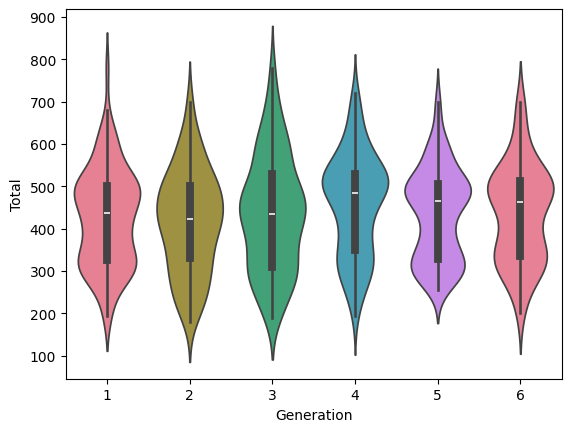

In [54]:
plt.clf()
sns.violinplot(x=df['Generation'], y=df['Total'], hue=df['Generation'], palette="husl", legend=False)
plt.show()